<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/Evidencia_de_aprendizaje_3_Vizualicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Evidencia 3**
Objetivo: Crear mapas mostrando variables del covid en colombia.

Descarga el archivo [aquí](https://docs.google.com/spreadsheets/d/1<1p7vd2y4yZteKLsmzRyq9mdfGkMGK-hpG/edit?usp=sharing&ouid=104296870928333730114&rtpof=true&sd=true)

# Carga las librerías y el mapa

In [ ]:
# Instalar Geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
!pip install pandas
!pip install numpy
!pip install geoplot

# Mapa general con la información georeferenciada por Departamento de los casos totales de Colombia.

## Mapa 1

In [17]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [18]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [19]:
col_states = json.load(open("/content/gist.githubusercontent.com_john-guerra_43c7656821069d00dcbc_raw_be6a6e239cd5b5b803c6e7c2ec405b793a9064dd_Colombia.geo.json", "r"))

In [20]:
state_id_map = {}
for feature in col_states["features"]:
    feature["id"] = feature["properties"]["DPTO"]
    state_id_map[feature["properties"]["NOMBRE_DPT"]] = feature["id"]


In [21]:
state_id_map

{'ANTIOQUIA': '05',
 'ATLANTICO': '08',
 'SANTAFE DE BOGOTA D.C': '11',
 'BOLIVAR': '13',
 'BOYACA': '15',
 'CALDAS': '17',
 'CAQUETA': '18',
 'CAUCA': '19',
 'CESAR': '20',
 'CORDOBA': '23',
 'CUNDINAMARCA': '25',
 'CHOCO': '27',
 'HUILA': '41',
 'LA GUAJIRA': '44',
 'MAGDALENA': '47',
 'META': '50',
 'NARIÑO': '52',
 'NORTE DE SANTANDER': '54',
 'QUINDIO': '63',
 'RISARALDA': '66',
 'SANTANDER': '68',
 'SUCRE': '70',
 'TOLIMA': '73',
 'VALLE DEL CAUCA': '76',
 'ARAUCA': '81',
 'CASANARE': '85',
 'PUTUMAYO': '86',
 'AMAZONAS': '91',
 'GUAINIA': '94',
 'GUAVIARE': '95',
 'VAUPES': '97',
 'VICHADA': '99',
 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA': '88'}

In [22]:
col_states["features"][1]["properties"]

{'DPTO': '08',
 'NOMBRE_DPT': 'ATLANTICO',
 'AREA': 3360765349.961,
 'PERIMETER': 240936.172,
 'HECTARES': 336076.535}

In [23]:
df=pd.read_excel("/content/2020-07-06-covid.xlsx")
df.head(5)


,Caso,Fecha Not,Departamento,nombre_depa,Ciudad_municipio,nombre_mun,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,...,Pais_viajo_1_cod,Pais_viajo_1_nom,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado,Fecha cargue web,Tipo_recuperacion,pertenencia etnica,nom_grupo_
0,1,2020-03-02 00:00:00,11,Bogotá D.C.,11001,Bogotá D.C.,19,F,Importado,Recuperado,...,380.0,ITALIA,2020-02-27 00:00:00,NaT,2020-03-06 00:00:00,2020-03-13,2020-03-06,PCR,Otro,NaN
1,2,2020-03-06 00:00:00,76,Valle del Cauca,76111,Guadalajara de Buga,34,M,Importado,Recuperado,...,724.0,ESPAÑA,2020-03-04 00:00:00,NaT,2020-03-09 00:00:00,2020-03-19,2020-03-09,PCR,Otro,NaN
2,3,2020-03-07 00:00:00,5,Antioquia,5001,Medellín,50,F,Importado,Recuperado,...,724.0,ESPAÑA,2020-02-29 00:00:00,NaT,2020-03-09 00:00:00,2020-03-15,2020-03-09,PCR,Otro,NaN
3,4,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,55,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-06 00:00:00,NaT,2020-03-11 00:00:00,2020-03-26,2020-03-11,PCR,Otro,NaN
4,5,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,25,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-08 00:00:00,NaT,2020-03-11 00:00:00,2020-03-23,2020-03-11,PCR,Otro,NaN


In [24]:
df["Departamento"] = df["Departamento"].apply(lambda x: f'0{x}' if x == 5 else x)
df.head(5)

,Caso,Fecha Not,Departamento,nombre_depa,Ciudad_municipio,nombre_mun,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,...,Pais_viajo_1_cod,Pais_viajo_1_nom,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado,Fecha cargue web,Tipo_recuperacion,pertenencia etnica,nom_grupo_
0,1,2020-03-02 00:00:00,11,Bogotá D.C.,11001,Bogotá D.C.,19,F,Importado,Recuperado,...,380.0,ITALIA,2020-02-27 00:00:00,NaT,2020-03-06 00:00:00,2020-03-13,2020-03-06,PCR,Otro,NaN
1,2,2020-03-06 00:00:00,76,Valle del Cauca,76111,Guadalajara de Buga,34,M,Importado,Recuperado,...,724.0,ESPAÑA,2020-03-04 00:00:00,NaT,2020-03-09 00:00:00,2020-03-19,2020-03-09,PCR,Otro,NaN
2,3,2020-03-07 00:00:00,05,Antioquia,5001,Medellín,50,F,Importado,Recuperado,...,724.0,ESPAÑA,2020-02-29 00:00:00,NaT,2020-03-09 00:00:00,2020-03-15,2020-03-09,PCR,Otro,NaN
3,4,2020-03-09 00:00:00,05,Antioquia,5001,Medellín,55,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-06 00:00:00,NaT,2020-03-11 00:00:00,2020-03-26,2020-03-11,PCR,Otro,NaN
4,5,2020-03-09 00:00:00,05,Antioquia,5001,Medellín,25,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-08 00:00:00,NaT,2020-03-11 00:00:00,2020-03-23,2020-03-11,PCR,Otro,NaN


In [25]:
df["ID"] = df["nombre_depa"].apply(lambda x: state_id_map.get(x.upper(), x.upper()))
df.head(5)

,Caso,Fecha Not,Departamento,nombre_depa,Ciudad_municipio,nombre_mun,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,...,Pais_viajo_1_nom,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado,Fecha cargue web,Tipo_recuperacion,pertenencia etnica,nom_grupo_,ID
0,1,2020-03-02 00:00:00,11,Bogotá D.C.,11001,Bogotá D.C.,19,F,Importado,Recuperado,...,ITALIA,2020-02-27 00:00:00,NaT,2020-03-06 00:00:00,2020-03-13,2020-03-06,PCR,Otro,NaN,BOGOTÁ D.C.
1,2,2020-03-06 00:00:00,76,Valle del Cauca,76111,Guadalajara de Buga,34,M,Importado,Recuperado,...,ESPAÑA,2020-03-04 00:00:00,NaT,2020-03-09 00:00:00,2020-03-19,2020-03-09,PCR,Otro,NaN,76
2,3,2020-03-07 00:00:00,05,Antioquia,5001,Medellín,50,F,Importado,Recuperado,...,ESPAÑA,2020-02-29 00:00:00,NaT,2020-03-09 00:00:00,2020-03-15,2020-03-09,PCR,Otro,NaN,05
3,4,2020-03-09 00:00:00,05,Antioquia,5001,Medellín,55,M,Relacionado,Recuperado,...,NaN,2020-03-06 00:00:00,NaT,2020-03-11 00:00:00,2020-03-26,2020-03-11,PCR,Otro,NaN,05
4,5,2020-03-09 00:00:00,05,Antioquia,5001,Medellín,25,M,Relacionado,Recuperado,...,NaN,2020-03-08 00:00:00,NaT,2020-03-11 00:00:00,2020-03-23,2020-03-11,PCR,Otro,NaN,05


In [26]:
# Agrupa por 'nombre_depa' y cuenta el número de casos
df_agrupado = df.groupby(['nombre_depa', 'Departamento'])['Caso'].count().reset_index()

# Cambia el nombre de la columna 'Caso' a 'Numero_de_casos'
df_agrupado = df_agrupado.rename(columns={'Caso': 'Numero_de_casos'})

# Si deseas que el nuevo DataFrame tenga un índice numérico limpio
df_agrupado = df_agrupado.reset_index(drop=True)


In [27]:
df_agrupado.head()

,nombre_depa,Departamento,Numero_de_casos
0,Amazonas,91,2384
1,Antioquia,05,6385
2,Arauca,81,96
3,Archipiélago de San Andrés Providencia y Santa...,88,28
4,Atlántico,8,12551


In [28]:
df_agrupado["casos_scale"]=np.log10(df_agrupado["Numero_de_casos"])
## escalo los datos con una transformacion para poder realizar una mejor coloracion de los departamentos

In [29]:
# Create the choropleth map
fig = px.choropleth(
    df_agrupado,
    locations="Departamento",
    geojson=col_states,
    color="casos_scale",
    title="Densidad de Casos de Covid Colombia",
)

# Update the geographical properties of the map
fig.update_geos(fitbounds="locations", visible=True)

# Display the map
fig.write_html('mapa_simple_2.html')

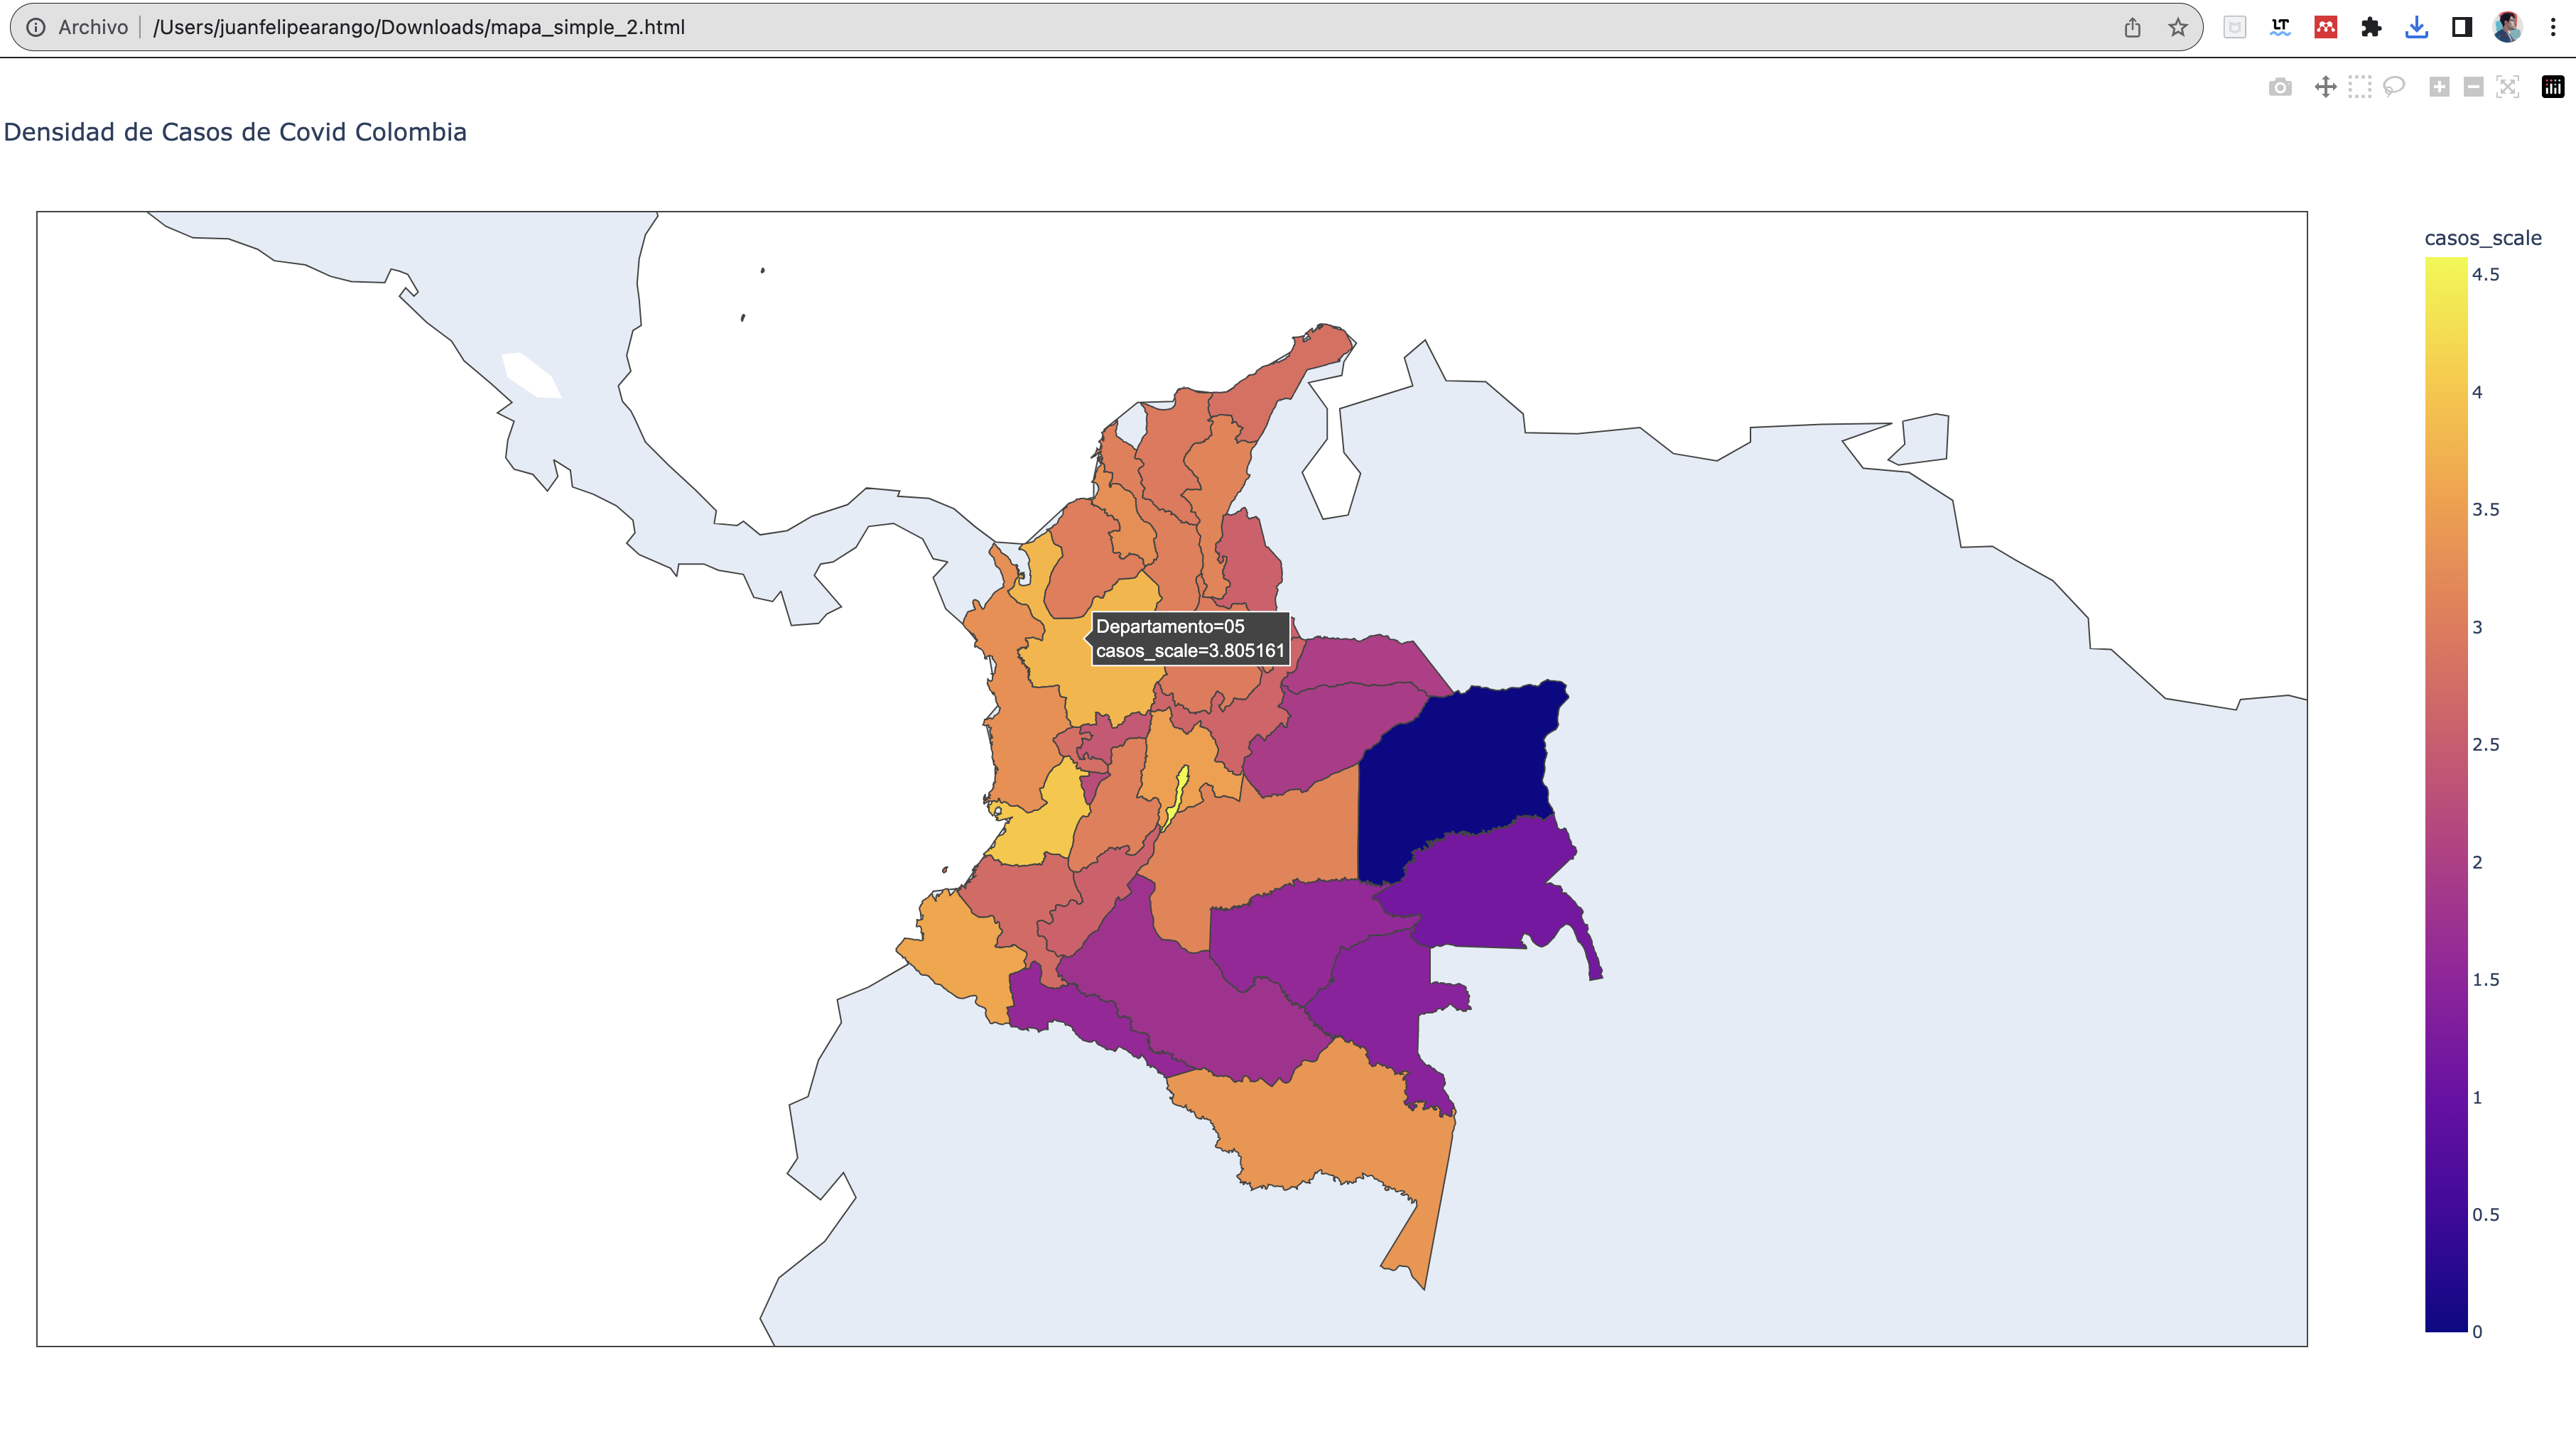

La imagen muestra un mapa de Colombia con las provincias en diferentes colores, que representan la densidad de casos de COVID-19. Los colores van del amarillo oscuro (densidad más alta) al azul claro (densidad más baja).

Las provincias con la mayor densidad de casos se encuentran en la región andina, particularmente en los departamentos de Antioquia, Valle del Cauca y Cundinamarca. Las provincias con la menor densidad de casos se encuentran en la región amazónica, particularmente en los departamentos de Guainía y Vaupés.

En general, la imagen proporciona una representación visual de la distribución desigual de casos de COVID-19 en Colombia. Muestra que la región andina es la región más afectada, mientras que la región amazónica es la región menos afectada.



## Mapa 2

In [ ]:
import pandas as pd
import plotly.express as px
import warnings
import sys

# Guardar la salida de errores en un archivo
sys.stderr = open('errores.txt', 'w')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignorar todas las advertencias
    # Código donde quieres evitar las advertencia

In [ ]:
# Agrupa por 'nombre_depa' y cuenta el número de casos
df_agrupado_A = df_covid.groupby(['Pais_viajo_1_nom'])['Caso'].count().reset_index()

In [ ]:
df_agrupado_A.head(5)

,Pais_viajo_1_nom,Caso
0,ALEMANIA,11
1,ANTILLAS NEERLANDESAS,8
2,ARABIA SAUDITA,1
3,ARABIA SAUDÍ,1
4,ARGENTINA,4


In [ ]:
## Transformando los datos a un escala logaritmia para visualizar mejor las diferencias
df_agrupado_A["casos_scale"]=np.log10(df_agrupado_A["Caso"])

In [ ]:
px.scatter_geo(df_agrupado_1,
               locations="Pais_viajo_1_nom",
               locationmode='country names',
               size='casos_scale',
               color='casos_scale',
               projection="natural earth",
               color_continuous_scale='rainbow',
               title="Paises de origen de casos confirmados",
               )

Error: ignored

Figure({
    'data': [{'geo': 'geo',
              'hovertemplate': 'casos_scale=%{marker.color}<br>Pais_viajo_1_nom=%{location}<extra></extra>',
              'legendgroup': '',
              'locationmode': 'country names',
              'locations': array(['ALEMANIA', 'ANTILLAS NEERLANDESAS', 'ARABIA SAUDITA', 'ARABIA SAUDÍ',
                                  'ARGENTINA', 'ARUBA', 'AUSTRALIA', 'BRASIL', 'BÉLGICA', 'CANADÁ',
                                  'CHILE', 'COSTA RICA', 'CROACIA', 'CUBA', 'CURAZAO', 'ECUADOR',
                                  'EGIPTO', 'EMIRATOS ARABES UNIDOS', 'ESPAÑA', 'ESTADOS UNIDOS',
                                  'ESTADOS UNIDOS DE AMERICA', 'FRANCIA', 'GRECIA', 'GUATEMALA',
                                  'HONDURAS', 'IRLANDA', 'ISRAEL', 'ITALIA', 'JAMAICA', 'KENYA',
                                  'MARRUECOS', 'MEXICO', 'MÉXICO', 'NICARAGUA', 'PANAMA', 'PERU',
                                  'PORTUGAL', 'PUERTO RICO',
                                  'REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL NORTE',
                                  'REPÚBLICA DOMINICANA', 'REPÚBLICA ÁRABE SIRIA', 'SUECIA', 'SUIZA',
                                  'TURQUÍA', 'URUGUAY', 'VENEZUELA'], dtype=object),
              'marker': {'color': array([1.04139269, 0.90308999, 0.        , 0.        , 0.60205999, 0.47712125,
                                         0.        , 1.78532984, 0.        , 0.47712125, 1.20411998, 0.30103   ,
                                         0.        , 0.60205999, 0.30103   , 1.75587486, 1.07918125, 0.30103   ,
                                         2.41995575, 2.33845649, 0.        , 1.25527251, 0.60205999, 0.        ,
                                         0.        , 0.        , 0.77815125, 1.        , 1.20411998, 0.        ,
                                         0.30103   , 0.30103   , 1.71600334, 0.30103   , 1.5563025 , 1.2787536 ,
                                         0.        , 1.11394335, 1.14612804, 1.11394335, 0.        , 0.        ,
                                         0.        , 1.44715803, 0.        , 0.77815125]),
                         'coloraxis': 'coloraxis',
                         'size': array([1.04139269, 0.90308999, 0.        , 0.        , 0.60205999, 0.47712125,
                                        0.        , 1.78532984, 0.        , 0.47712125, 1.20411998, 0.30103   ,
                                        0.        , 0.60205999, 0.30103   , 1.75587486, 1.07918125, 0.30103   ,
                                        2.41995575, 2.33845649, 0.        , 1.25527251, 0.60205999, 0.        ,
                                        0.        , 0.        , 0.77815125, 1.        , 1.20411998, 0.        ,
                                        0.30103   , 0.30103   , 1.71600334, 0.30103   , 1.5563025 , 1.2787536 ,
                                        0.        , 1.11394335, 1.14612804, 1.11394335, 0.        , 0.        ,
                                        0.        , 1.44715803, 0.        , 0.77815125]),
                         'sizemode': 'area',
                         'sizeref': 0.006049889371224395,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergeo'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'casos_scale'}},
                             'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125,
                                            'rgb(0,0,200)'], [0.25,
                                            'rgb(0,25,255)'], [0.375,
                                            'rgb(0,152,255)'], [0.5,
                                            'rgb(44,255,150)'], [0.625,
                                            'rgb(151,255,0)'], [0.75,
                                            'rgb(255,234,0)'], [0.875,
                                            'rgb(255,111,0)'], [1.0,
                  

# Escoger una variable diferente a ubicación [Casa, UCI, Recuperado..] Puede ser edad, sexo, estado.... y construye al menos dos mapas, uno por cada categría de la variable seleccionada. Por ejemplo si escogiste sexo, construye un mapa para mostrar los casos en hombres y otro mapa para mostrar los casos en mujeres. Utiliza los subplots de matplotlib para lograrlo.


## Mapa 1

In [10]:
import pandas as pd
import plotly.express as px
import warnings
import sys
import json
import numpy as np


# Guardar la salida de errores en un archivo
sys.stderr = open('errores.txt', 'w')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignorar todas las advertencias
    # Código donde quieres evitar las advertencia

In [4]:
col_states = json.load(open("/content/gist.githubusercontent.com_john-guerra_43c7656821069d00dcbc_raw_be6a6e239cd5b5b803c6e7c2ec405b793a9064dd_Colombia.geo.json", "r"))
df=pd.read_excel("/content/2020-07-06-covid.xlsx")
df.head(5)


,Caso,Fecha Not,Departamento,nombre_depa,Ciudad_municipio,nombre_mun,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,...,Pais_viajo_1_cod,Pais_viajo_1_nom,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado,Fecha cargue web,Tipo_recuperacion,pertenencia etnica,nom_grupo_
0,1,2020-03-02 00:00:00,11,Bogotá D.C.,11001,Bogotá D.C.,19,F,Importado,Recuperado,...,380.0,ITALIA,2020-02-27 00:00:00,NaT,2020-03-06 00:00:00,2020-03-13,2020-03-06,PCR,Otro,NaN
1,2,2020-03-06 00:00:00,76,Valle del Cauca,76111,Guadalajara de Buga,34,M,Importado,Recuperado,...,724.0,ESPAÑA,2020-03-04 00:00:00,NaT,2020-03-09 00:00:00,2020-03-19,2020-03-09,PCR,Otro,NaN
2,3,2020-03-07 00:00:00,5,Antioquia,5001,Medellín,50,F,Importado,Recuperado,...,724.0,ESPAÑA,2020-02-29 00:00:00,NaT,2020-03-09 00:00:00,2020-03-15,2020-03-09,PCR,Otro,NaN
3,4,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,55,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-06 00:00:00,NaT,2020-03-11 00:00:00,2020-03-26,2020-03-11,PCR,Otro,NaN
4,5,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,25,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-08 00:00:00,NaT,2020-03-11 00:00:00,2020-03-23,2020-03-11,PCR,Otro,NaN


In [30]:
# Agrupa por 'nombre_depa' y cuenta el número de casos
df_agrupado_sexo = df.groupby(["nombre_depa",'Sexo',"Departamento"])['Caso'].count().reset_index()

In [31]:
df_agrupado_sexo.head(5)

,nombre_depa,Sexo,Departamento,Caso
0,Amazonas,F,91,999
1,Amazonas,M,91,1385
2,Antioquia,F,05,2575
3,Antioquia,M,05,3809
4,Antioquia,m,05,1


# Mapa Casos Covid genero Femenino

In [32]:
# MUJERES CASOS
filtered_F = df_agrupado_sexo[df_agrupado_sexo['Sexo'] == "F"]

In [33]:
filtered_F.head(5)

,nombre_depa,Sexo,Departamento,Caso
0,Amazonas,F,91,999
2,Antioquia,F,05,2575
5,Arauca,F,81,13
7,Archipiélago de San Andrés Providencia y Santa...,F,88,7
9,Atlántico,F,8,5774


In [34]:
filtered_F["casos_scale"]=np.log10(filtered_F["Caso"])
## escalo los datos con una transformacion para poder realizar una mejor coloracion de los departamentos

In [35]:
filtered_F.head(5)

,nombre_depa,Sexo,Departamento,Caso,casos_scale
0,Amazonas,F,91,999,2.999565
2,Antioquia,F,05,2575,3.410777
5,Arauca,F,81,13,1.113943
7,Archipiélago de San Andrés Providencia y Santa...,F,88,7,0.845098
9,Atlántico,F,8,5774,3.761477


In [39]:
# Create the choropleth map
fig = px.choropleth(
    filtered_F,
    locations="Departamento",
    geojson=col_states,
    color="casos_scale",
    title="Casos de Covid en el Genero femenino",
)

# Update the geographical properties of the map
fig.update_geos(fitbounds="locations", visible=True)

# Display the map
fig.write_html('mapa_simple_MUJERES.html')

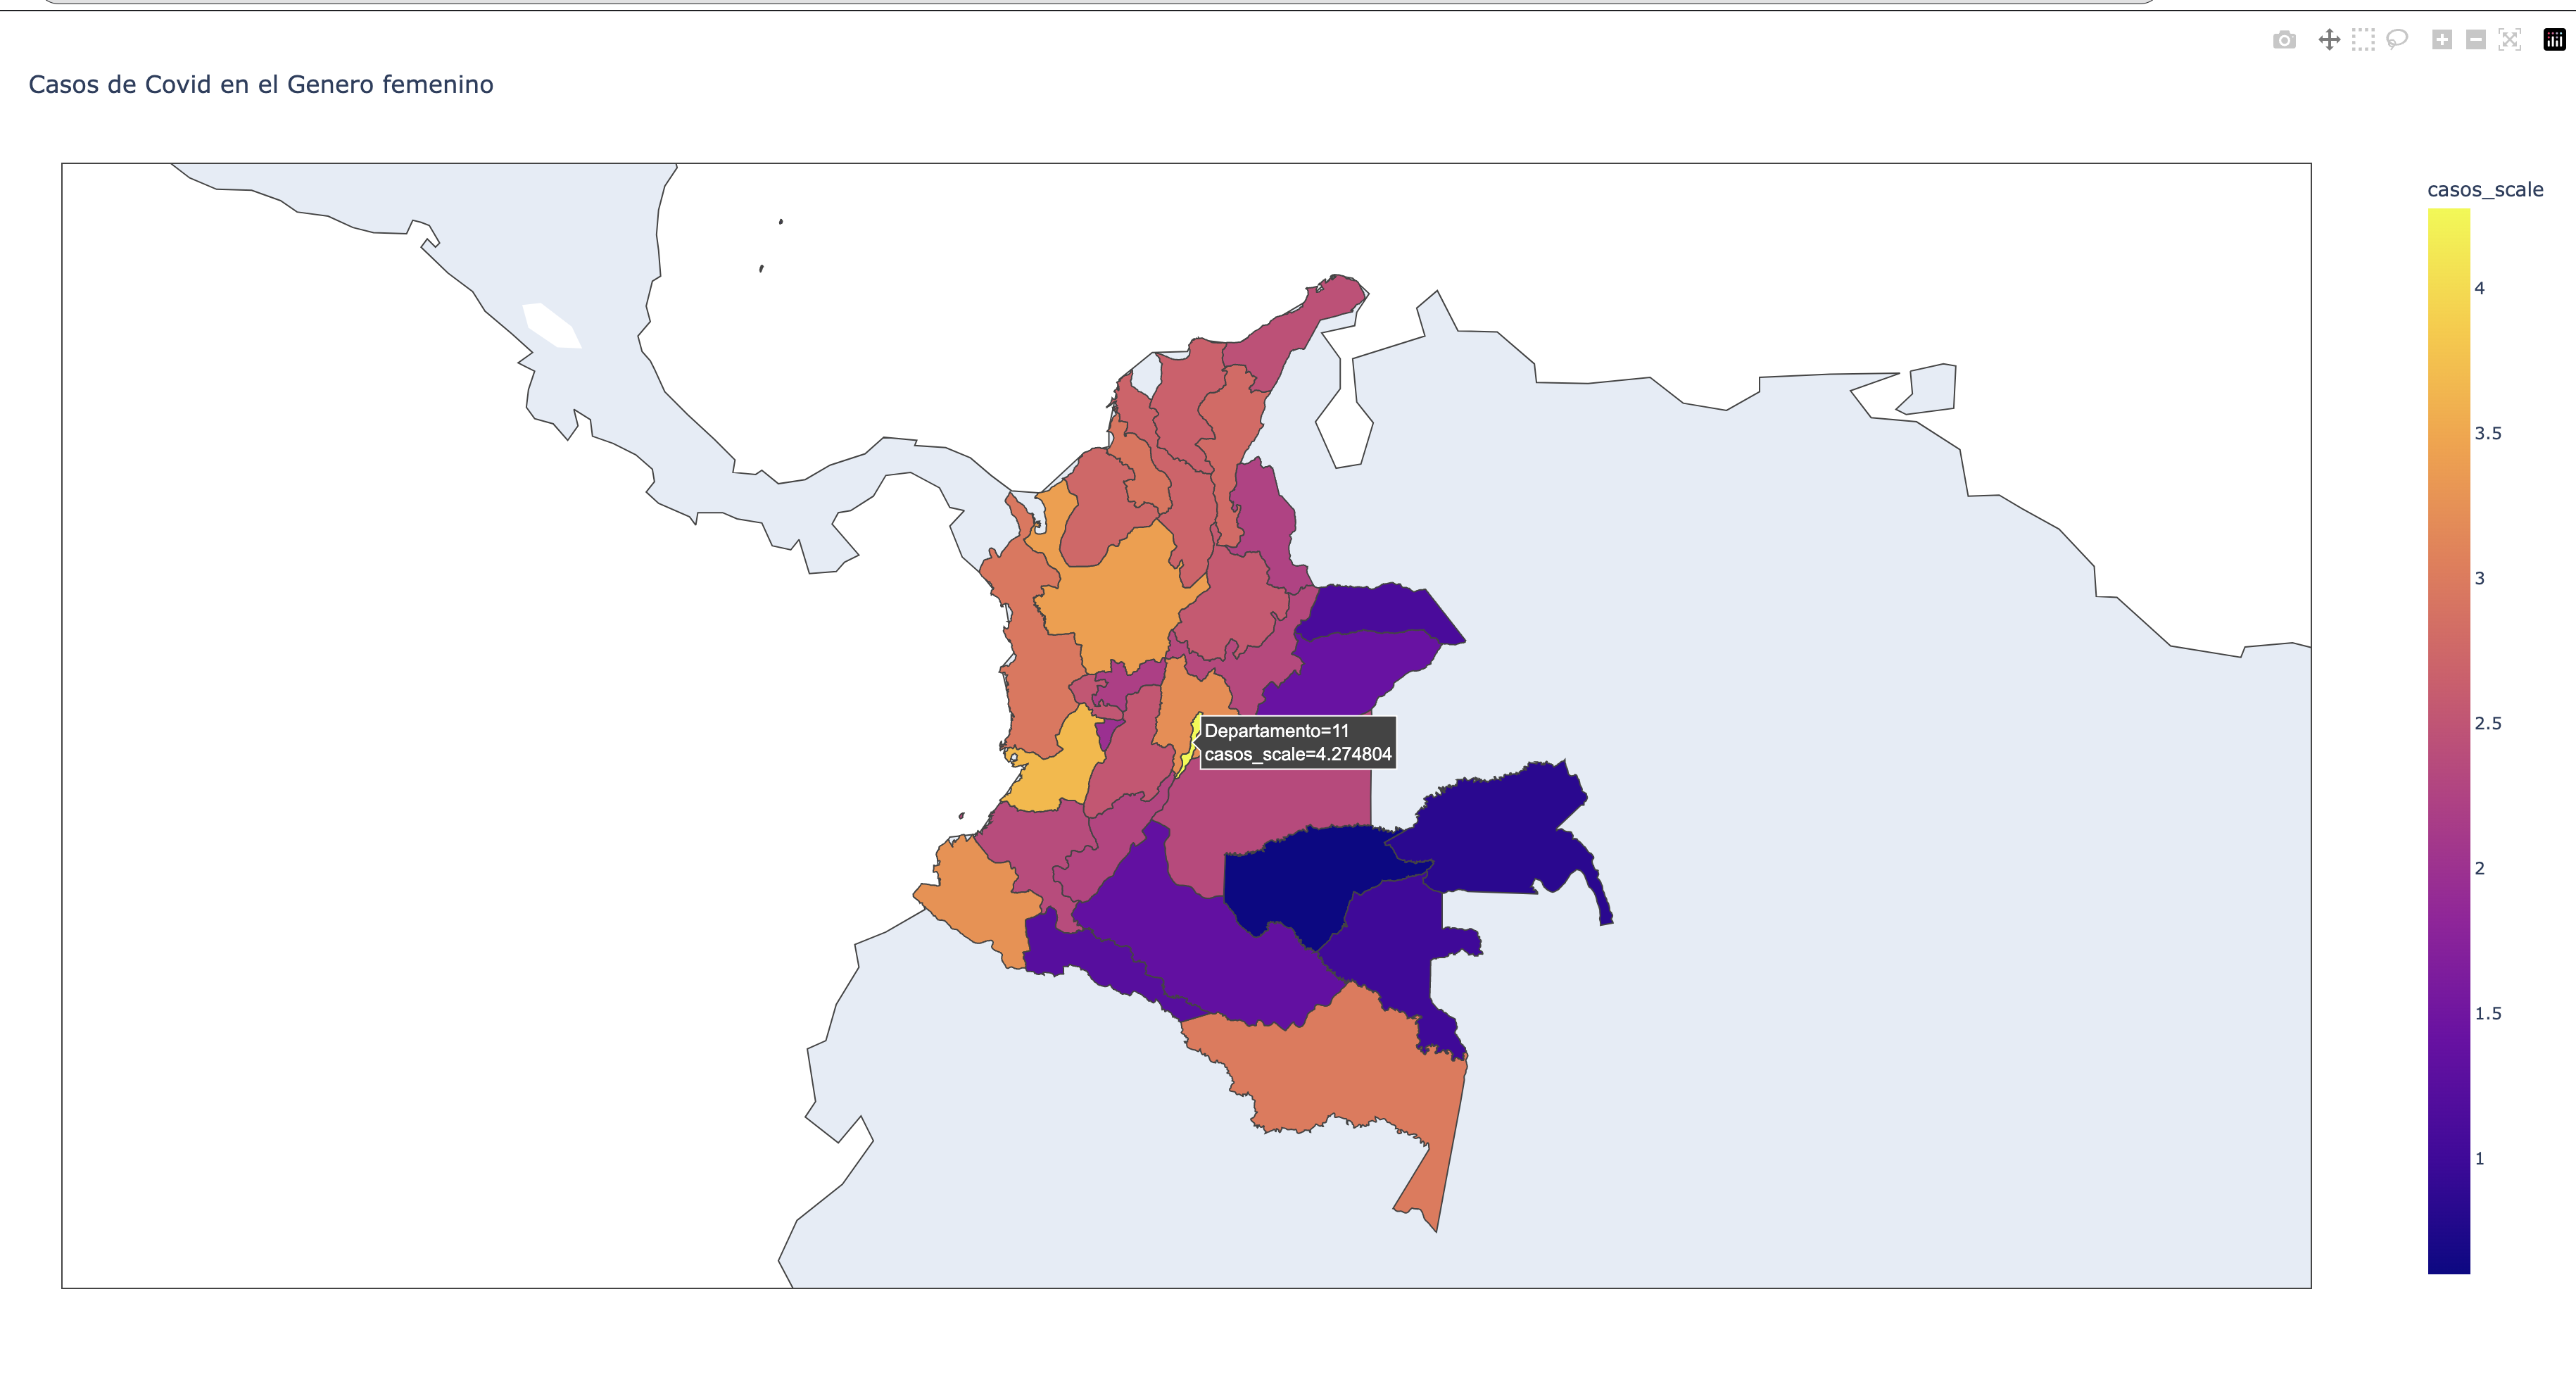

# Mapa Casos Covid genero Femenino

In [41]:
# HOMBRES CASOS
filtered_M = df_agrupado_sexo[df_agrupado_sexo['Sexo'] == "M"]

In [42]:
filtered_M.head(5)

,nombre_depa,Sexo,Departamento,Caso
1,Amazonas,M,91,1385
3,Antioquia,M,05,3809
6,Arauca,M,81,83
8,Archipiélago de San Andrés Providencia y Santa...,M,88,21
10,Atlántico,M,8,6777


In [43]:
filtered_M["casos_scale"]=np.log10(filtered_M["Caso"])
## escalo los datos con una transformacion para poder realizar una mejor coloracion de los departamentos

In [44]:
filtered_M.head(5)

,nombre_depa,Sexo,Departamento,Caso,casos_scale
1,Amazonas,M,91,1385,3.141450
3,Antioquia,M,05,3809,3.580811
6,Arauca,M,81,83,1.919078
8,Archipiélago de San Andrés Providencia y Santa...,M,88,21,1.322219
10,Atlántico,M,8,6777,3.831037


In [46]:
# Create the choropleth map
fig = px.choropleth(
    filtered_M,
    locations="Departamento",
    geojson=col_states,
    color="casos_scale",
    title="Casos de Covid en el Genero Masculino",
)

# Update the geographical properties of the map
fig.update_geos(fitbounds="locations", visible=True)

# Display the map
fig.write_html('mapa_simple_HOMBRES.html')

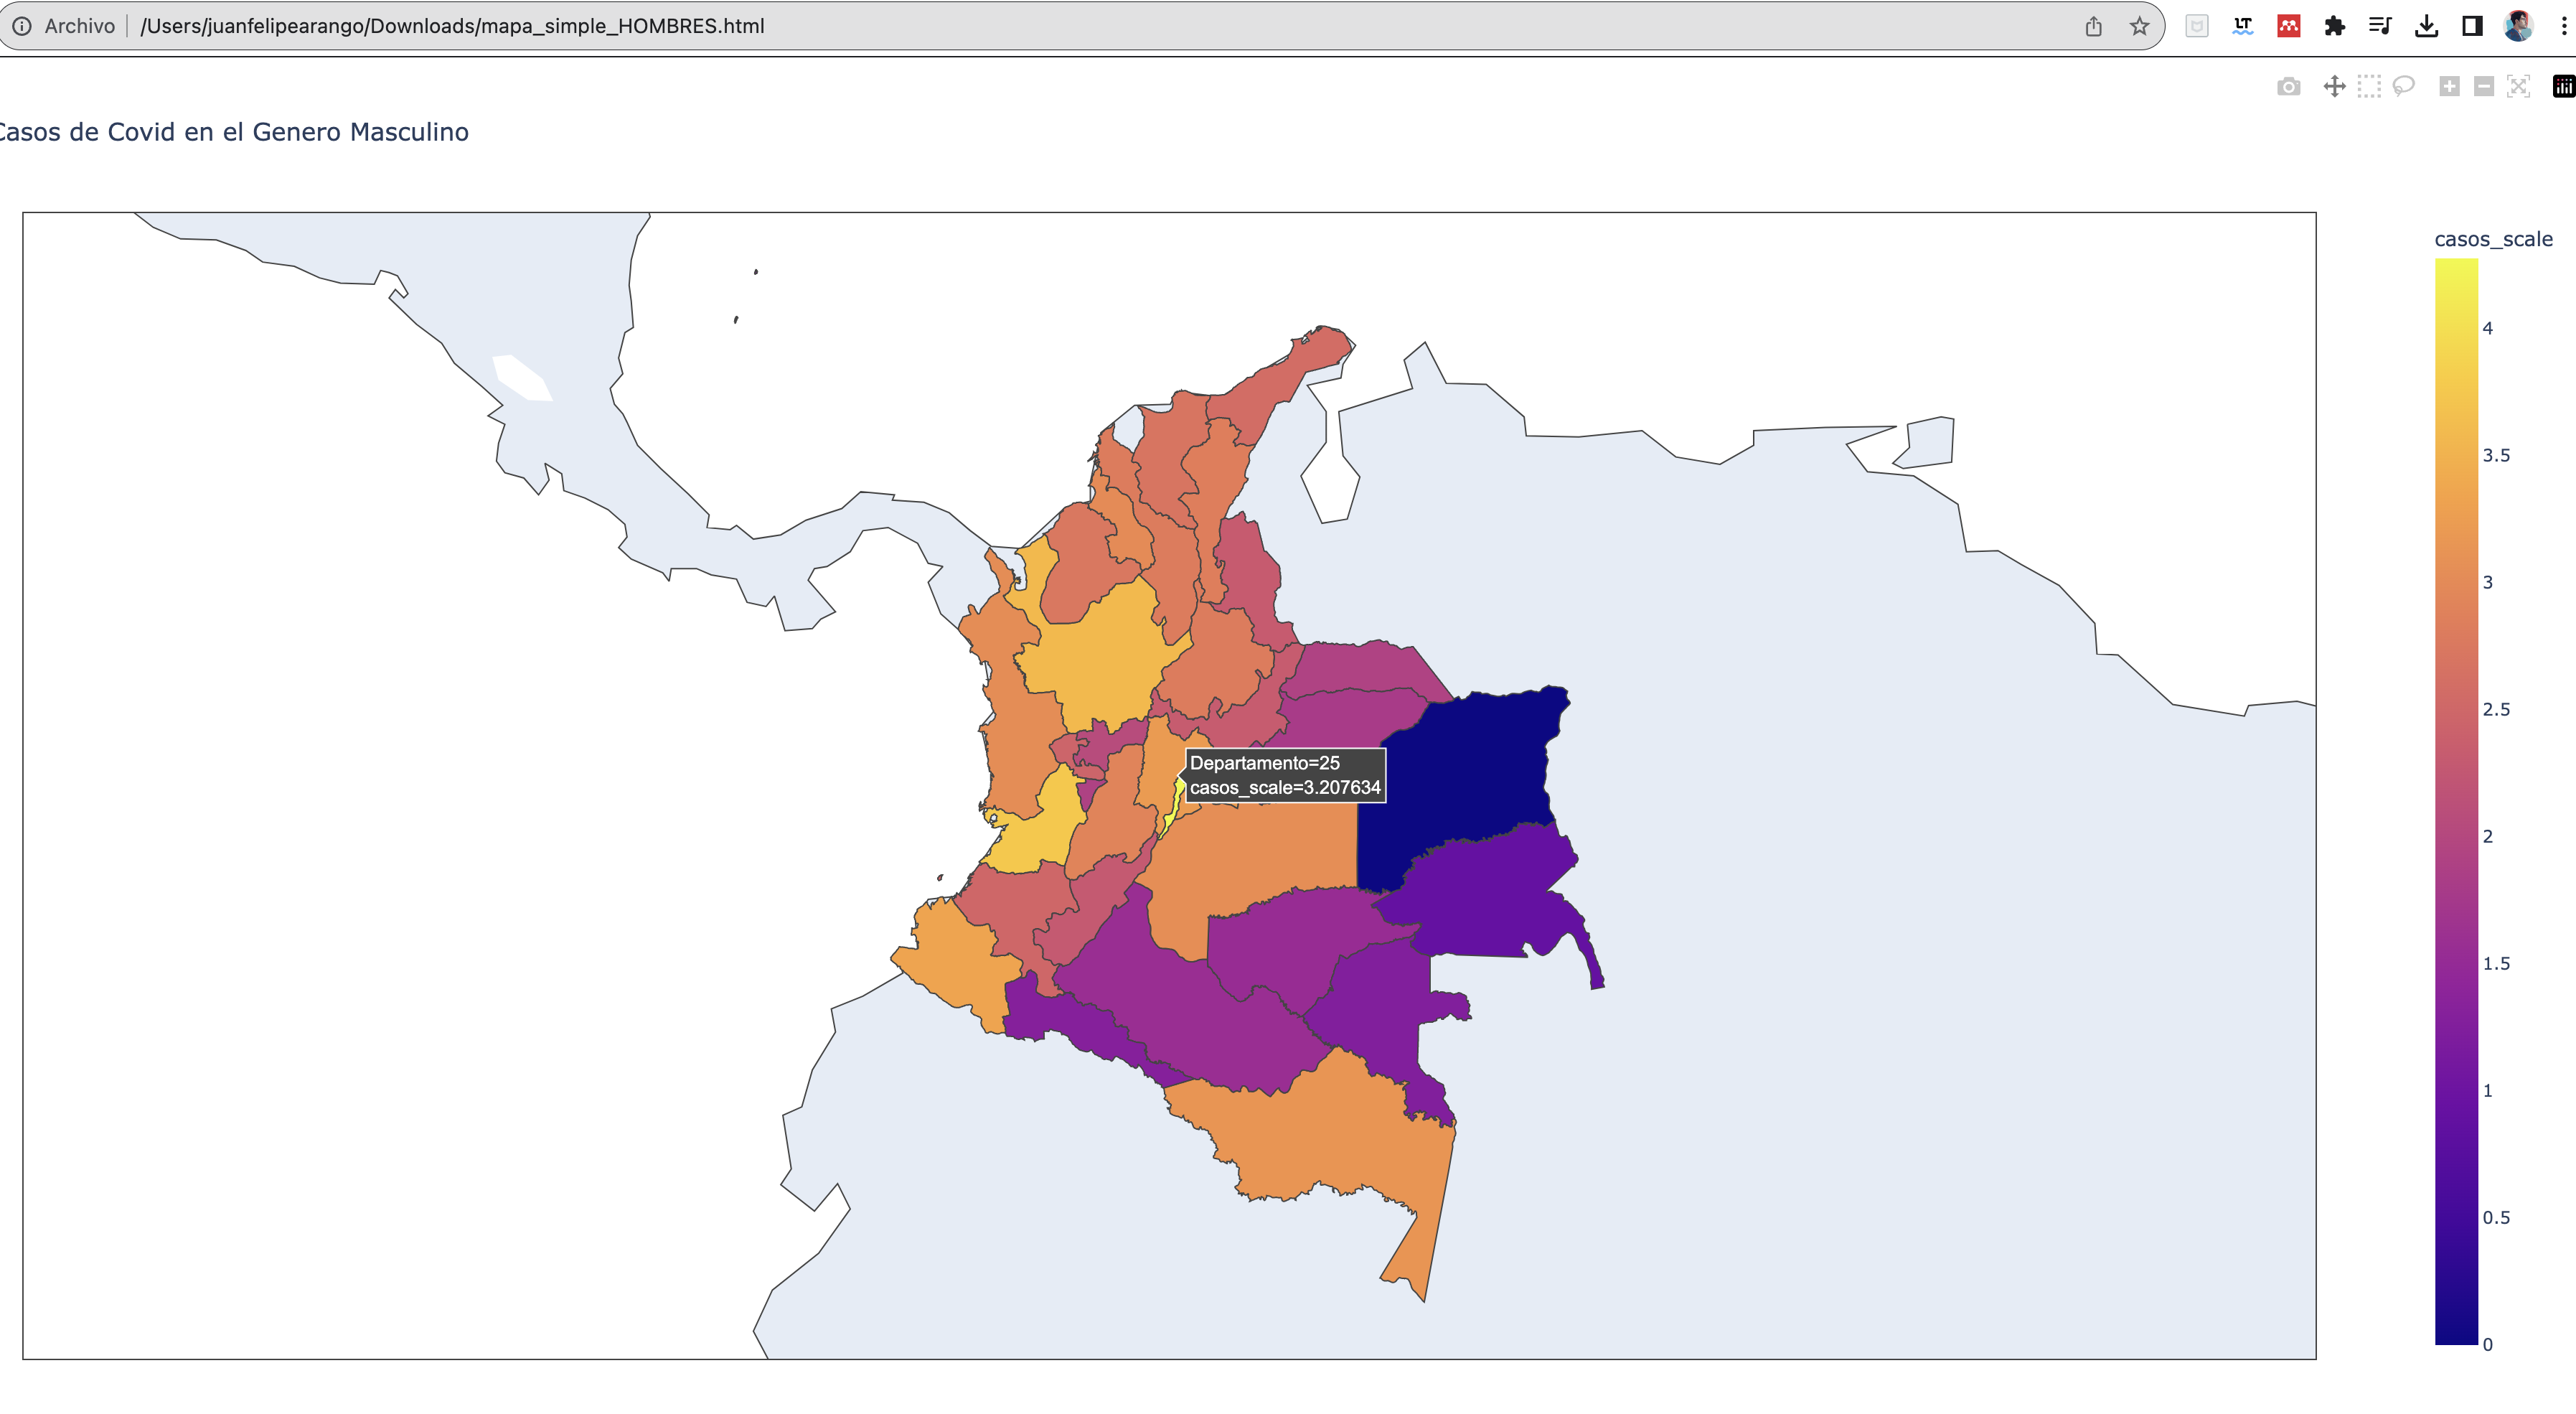

# OTROS

In [52]:
import folium
from folium import plugins


In [141]:

## Creando un mapa inicial de Colombia
from folium import GeoJson
geo="/content/gist.githubusercontent.com_john-guerra_43c7656821069d00dcbc_raw_be6a6e239cd5b5b803c6e7c2ec405b793a9064dd_Colombia.geo.json"
file = open(geo, encoding="utf8")
text = file.read()

colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

#Agrega minimapa
minimap = plugins.MiniMap()
colombia_map.add_child(minimap)

# Agrega marcaodres a una de interes ciudades
GeoJson(text).add_to(colombia_map)
folium.Marker([4.6097, -74.0817], popup='Bogotá, D.C.').add_to(colombia_map)
folium.Marker([3.4216, -76.5205], popup='Cali').add_to(colombia_map)
folium.Marker([10.9834, -74.8281], popup='Cartagena').add_to(colombia_map)

# Agrega un círculo para representar una región
folium.Circle(
    location=[6.217, -75.567], radius=50000, popup='Medellín', color='crimson', fill=False,fill_color='red'
).add_to(colombia_map)


colombia_map

In [75]:
col_states = json.load(open("/content/co.json", "r"))
df=pd.read_excel("/content/2020-07-06-covid.xlsx")
df.head(5)


,Caso,Fecha Not,Departamento,nombre_depa,Ciudad_municipio,nombre_mun,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,...,Pais_viajo_1_cod,Pais_viajo_1_nom,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado,Fecha cargue web,Tipo_recuperacion,pertenencia etnica,nom_grupo_
0,1,2020-03-02 00:00:00,11,Bogotá D.C.,11001,Bogotá D.C.,19,F,Importado,Recuperado,...,380.0,ITALIA,2020-02-27 00:00:00,NaT,2020-03-06 00:00:00,2020-03-13,2020-03-06,PCR,Otro,NaN
1,2,2020-03-06 00:00:00,76,Valle del Cauca,76111,Guadalajara de Buga,34,M,Importado,Recuperado,...,724.0,ESPAÑA,2020-03-04 00:00:00,NaT,2020-03-09 00:00:00,2020-03-19,2020-03-09,PCR,Otro,NaN
2,3,2020-03-07 00:00:00,5,Antioquia,5001,Medellín,50,F,Importado,Recuperado,...,724.0,ESPAÑA,2020-02-29 00:00:00,NaT,2020-03-09 00:00:00,2020-03-15,2020-03-09,PCR,Otro,NaN
3,4,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,55,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-06 00:00:00,NaT,2020-03-11 00:00:00,2020-03-26,2020-03-11,PCR,Otro,NaN
4,5,2020-03-09 00:00:00,5,Antioquia,5001,Medellín,25,M,Relacionado,Recuperado,...,NaN,NaN,2020-03-08 00:00:00,NaT,2020-03-11 00:00:00,2020-03-23,2020-03-11,PCR,Otro,NaN


In [56]:
# Agrupa por 'nombre_depa' y cuenta el número de casos
df_agrupado_l = df.groupby(['nombre_depa', 'Departamento'])['Caso'].count().reset_index()

# Cambia el nombre de la columna 'Caso' a 'Numero_de_casos'
df_agrupado_l = df_agrupado_l.rename(columns={'Caso': 'Numero_de_casos'})

# Si deseas que el nuevo DataFrame tenga un índice numérico limpio
df_agrupado_l = df_agrupado_l.reset_index(drop=True)

In [57]:
df_agrupado_l.head(5)

,nombre_depa,Departamento,Numero_de_casos
0,Amazonas,91,2384
1,Antioquia,5,6385
2,Arauca,81,96
3,Archipiélago de San Andrés Providencia y Santa...,88,28
4,Atlántico,8,12551


In [101]:
df_agrupado_l["casos_scale"]=np.log10(df_agrupado_l["Numero_de_casos"])
## escalo los datos con una transformacion para poder realizar una mejor coloracion de los departamentos

In [102]:
df=df_agrupado.head(4)

In [88]:
df_6 = pd.DataFrame(col_states)
df_6.head(5)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Bogotá,4.7111,-74.0722,Colombia,CO,Bogotá,primary,7968095,7743955
1,Timbío,2.3445,-76.6839,Colombia,CO,Cauca,minor,4444444,4444444
2,Medellín,6.2308,-75.5906,Colombia,CO,Antioquia,admin,2529403,2529403
3,Cali,3.4206,-76.5222,Colombia,CO,Valle del Cauca,admin,2471474,2471474
4,Barranquilla,10.9833,-74.8019,Colombia,CO,Atlántico,admin,1326588,1274250


In [92]:
df_6 = df_6.rename(columns={'admin_name': 'nombre_depa'})

In [126]:
df_6.head(5)

,city,lat,lng,country,iso2,nombre_depa,capital,population,population_proper
0,Bogotá,4.7111,-74.0722,Colombia,CO,Bogotá,primary,7968095,7743955
1,Timbío,2.3445,-76.6839,Colombia,CO,Cauca,minor,4444444,4444444
2,Medellín,6.2308,-75.5906,Colombia,CO,Antioquia,admin,2529403,2529403
3,Cali,3.4206,-76.5222,Colombia,CO,Valle del Cauca,admin,2471474,2471474
4,Barranquilla,10.9833,-74.8019,Colombia,CO,Atlántico,admin,1326588,1274250


In [136]:
# Realiza una fusión (merge) basada en la columna 'departamento'
df_resultado = pd.merge(df, df_6[['nombre_depa', 'lat', 'lng']], on='nombre_depa', how='inner').reset_index()

df_resultado.head(5)

,index,nombre_depa,Departamento,Numero_de_casos,casos_scale,lat,lng
0,0,Amazonas,91,2384,3.377306,-4.2167,-69.9333
1,1,Antioquia,05,6385,3.805161,6.2308,-75.5906
2,2,Antioquia,05,6385,3.805161,6.3333,-75.5667
3,3,Antioquia,05,6385,3.805161,6.1667,-75.6167
4,4,Antioquia,05,6385,3.805161,6.1667,-75.5667


In [137]:
df_resultado = df_resultado.dropna()

In [138]:
df_resultado = df_resultado.groupby('nombre_depa').sum

In [142]:
# Itera sobre las filas del DataFrame y añade las burbujas al mapa
for index, row in df_resultado.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=row['Numero_de_casos'] / 10,  # El radio de la burbuja depende del número de casos
        popup=f"{row['nombre_depa']} - Casos: {row['Numero_de_casos']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(colombia_map)

# Visualiza el mapa
colombia_map.save('mapa.html')

AttributeError: ignored